<a href="https://colab.research.google.com/github/pratyushgta/image-video-processing/blob/main/IVP_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

# EXPERIMENT 4

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # used for plotting/displaying the image. without this lib, pic will be displayed as a set of numbers / pixels
import numpy as np
# following will be used in filtering & saltpepper
from skimage import io
from skimage.color import rgb2gray
from scipy import signal

In [ ]:
im = mpimg.imread("LisaMona2.jpeg") # b&w
imc = mpimg.imread("LisaMona3.jpeg") # rgb/ colored
imh = mpimg.imread("LisaMonaHouse.png")

> **4.a AVERAGING FILTER**

In [ ]:
im_copy = imc.copy()
sh = im_copy.shape
print(sh,im_copy.dtype,type(im_copy))

(1788, 1200, 3) uint8 <class 'numpy.ndarray'>


In [ ]:
# add gaussian noise to image and then apply 3x3,5x5,etc averaging filters to create two filtered versions of the noisy image
# These filters are used to smooth and blur the image
# signma 5, 10, 20

# Creating Gaussian Noise with mean 0 and sd 20
mu, sigma = 0, 20 # mean and sd
gn = np.random.normal(mu,sigma,(sh[0],sh[1])) # it will generate an array of random numbers, distributed equally (adding random nosie)
gn.shape

(1788, 1200)

In [ ]:
# Gaussian noise is added to each color channel (rgb) by element-wise addition. This results in a noisy version of the original image
#[:, :, x] denotes all rows, all column, frame
img_gn = im_copy.copy()
img_gn[:,:,0] = im_copy[:,:,0]+gn # red frame, : = all rows & cols of frame 0
img_gn[:,:,1] = im_copy[:,:,1]+gn # green frame
img_gn[:,:,2] = im_copy[:,:,2]+gn # blue frame

In [ ]:
def averaging(sz):
  avg_filter=np.ones((sz,sz))/(sz*sz)
  img_avg = img_gn.copy()
  img_avg[:,:,0] = signal.convolve2d(img_gn[:,:,0],avg_filter,mode="same") # same = 0 padding | valid = truncation
  img_avg[:,:,1] = signal.convolve2d(img_gn[:,:,1],avg_filter,mode="same") # signal.convolve2d fn is used to convolve/ merge this filter with each color channel of the noisy img
  img_avg[:,:,2] = signal.convolve2d(img_gn[:,:,2],avg_filter,mode="same")
  return img_avg

In [ ]:
# size of avg filter, sz=3,5,7,11
img_avg3 = averaging(3)
img_avg5 = averaging(5)
img_avg7 = averaging(7)
img_avg9 = averaging(9)
img_avg11 = averaging(11)

> **4.b WEIGHTED AVERAGING FILTER**

In [ ]:
# APPLYING 3x3 WEIGHTED AVERAGE FILTER
sz=3
wavg_filter = [[1/16,2/16,1/16],[2/16,4/15,2/16],[1/16,2/16,1/16]]
img_w_avg3 = img_gn.copy()
img_w_avg3[:,:,0] = signal.convolve2d(img_gn[:,:,0],wavg_filter,mode="same")
img_w_avg3[:,:,1] = signal.convolve2d(img_gn[:,:,1],wavg_filter,mode="same")
img_w_avg3[:,:,2] = signal.convolve2d(img_gn[:,:,2],wavg_filter,mode="same")

Text(0.5, 1.0, '3x3 weighted_avg filter')

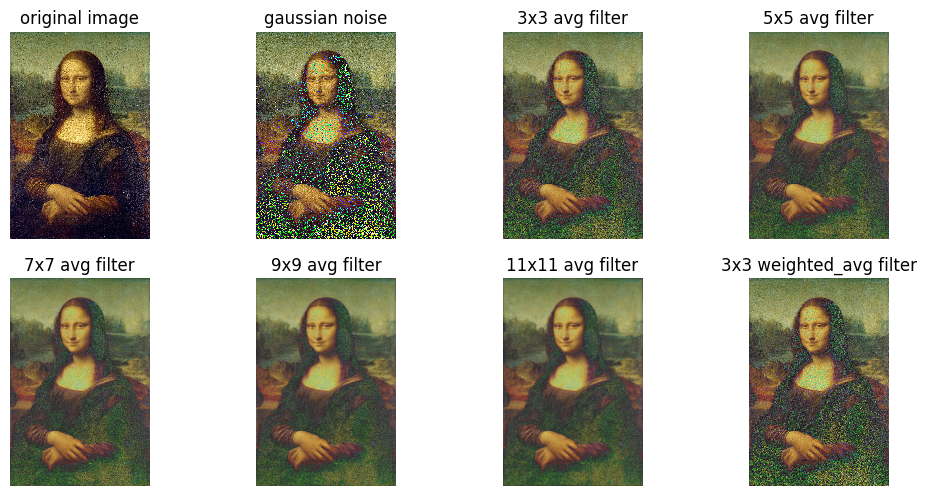

In [ ]:
# original image
plt.figure(figsize=(10,10))

plt.subplot(4,4,1)
io.imshow(im_copy)
plt.axis('off')
plt.title('original image')

plt.subplot(4,4,2)
io.imshow(img_gn)
plt.axis('off')
plt.title('gaussian noise')

plt.subplot(4,4,3)
io.imshow(img_avg3)
plt.axis('off')
plt.title('3x3 avg filter')

plt.subplot(4,4,4)
io.imshow(img_avg5)
plt.axis('off')
plt.title('5x5 avg filter')

plt.subplot(4,4,5)
io.imshow(img_avg7)
plt.axis('off')
plt.title('7x7 avg filter')

plt.subplot(4,4,6)
io.imshow(img_avg9)
plt.axis('off')
plt.title('9x9 avg filter')

plt.subplot(4,4,7)
io.imshow(img_avg11)
plt.axis('off')
plt.title('11x11 avg filter')

plt.subplot(4,4,8)
io.imshow(img_w_avg3)
plt.axis('off')
plt.title('3x3 weighted_avg filter')

> **4.c SALT & PEPPER NOISE REMOVAL USING MEDIAN FILTER**

Text(0.5, 1.0, 's&p')

<Figure size 640x480 with 0 Axes>

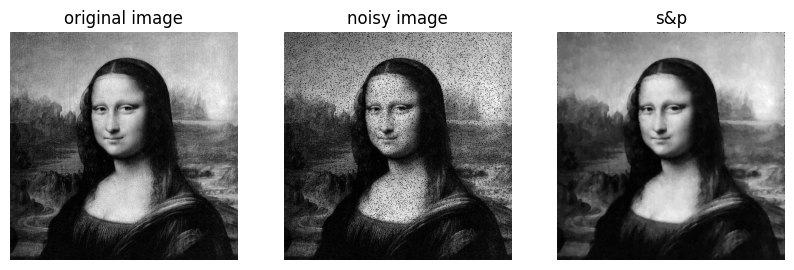

In [ ]:
# apply salt-and-pepper noise to an input image and then perform median filtering to remove the noise
import random

img_spnoise = im.copy()
sh = img_spnoise.shape
a=0.1 # probability
sp_num=int(sh[0]*sh[1]*a) # calculates number of noisy pixels based on the specified probability 'a'
sp_val = 1 # represents the salt component (white) of salt-and-pepper noise

# Adding salt & pepper noise to image
random.seed(1) # Seed for reproducibility
# iterates sp_num times, randomly selecting pixel coordinates (temp1 and temp2)
# within the image and setting the pixel value to either 1 (salt) or 0 (pepper)
for i in range(0,sp_num):
  temp1=random.randint(0,sh[0]-1) # -1 because first row
  temp2=random.randint(0,sh[1]-1)
  img_spnoise[temp1][temp2]=sp_val
  if sp_val==1: # alternates between salt and pepper based on the sp_val variable.
    sp_val=0
  else:
    sp_val=1

# apply the median filter which removes noise by replacing noisy pixels with the median value of their neighborhood
img_spfilter=img_spnoise.copy()
sz=3 # Size of the median filter kernel
# center of masked image
cent = int((sz-1)/2)
# location of median within the sorted values
med=int(((sz*sz)-1)/2)
# iterates over the image pixels excluding the border pixels
for row in range(0,sh[0]-sz):
  for col in range(1,sh[1]-sz):
    temp = img_spfilter[row:row+sz,col:col+sz] # extract a 3x3 neighborhood around each pixel (temp) and flatten it into a 1D array
    temp = np.reshape(temp,(1,sz*sz))
    temp = np.sort(temp) # sort neighborhood values
    img_spfilter[row+cent,col+cent]=temp[0][med] # median value is extracted from the sorted values and placed at the center pixel of the filtered image


# original image
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,3,2)
plt.imshow(img_spnoise,cmap='gray')
plt.axis('off')
plt.title('noisy image')

plt.subplot(1,3,3)
plt.imshow(img_spfilter,cmap='gray')
plt.axis('off')
plt.title('s&p')

> **IMAGE SHARPENING**

In [ ]:
im_og = io.imread('LisaMonaHouse.png')
img = im_og
#img = rgb2gray(im_og)
sh = img.shape
print(img.dtype, sh, type(img))

uint8 (602, 602, 4) <class 'numpy.ndarray'>


> **Using High Pass Filter**

Text(0.5, 1.0, 'high pass 3x3 image')

<Figure size 640x480 with 0 Axes>

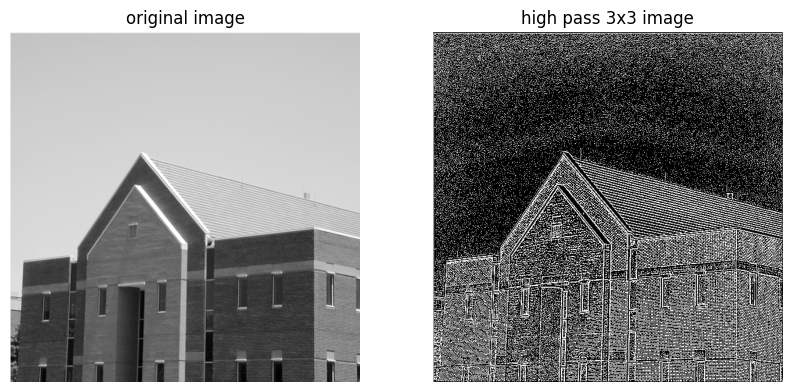

In [ ]:
# high pass filter
hp_filter = [[-1/9,-1/9,-1/9],[-1/9,8/9,-1/9],[-1/9,-1/9,-1/9]]
im_highpass = img.copy()
im_highpass[:, :, 0] = signal.convolve2d(img[:, :, 0], hp_filter, mode="same")
im_highpass[:, :, 1] = signal.convolve2d(img[:, :, 1], hp_filter, mode="same")
im_highpass[:, :, 2] = signal.convolve2d(img[:, :, 2], hp_filter, mode="same")

# plotting
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,2,2)
plt.imshow(im_highpass,cmap='gray')
plt.axis('off')
plt.title('high pass 3x3 image')

> **4.d Using Laplacian Filter**

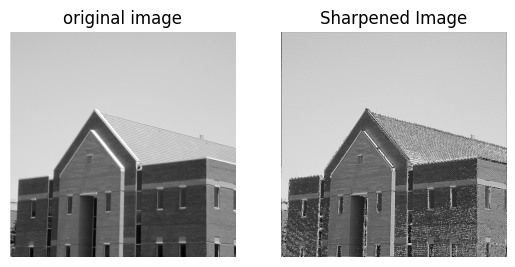

In [ ]:
# Define the Laplacian filter
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Apply the Laplacian filter
im_laplacian = img.copy()
for channel in range(3):
    im_laplacian[:, :, channel] = signal.convolve2d(img[:, :, channel], laplacian_filter, mode="same")

# Add the Laplacian-enhanced image to the original image
sharpened_image = img + im_laplacian

# Clip the pixel values to ensure they are in the valid range [0, 255]
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# plotting
plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(sharpened_image)
plt.axis('off')
plt.title("Sharpened Image")

plt.show()

> **4.e Using High Boost Filter**

Text(0.5, 1.0, '1.2 high boost image')

<Figure size 640x480 with 0 Axes>

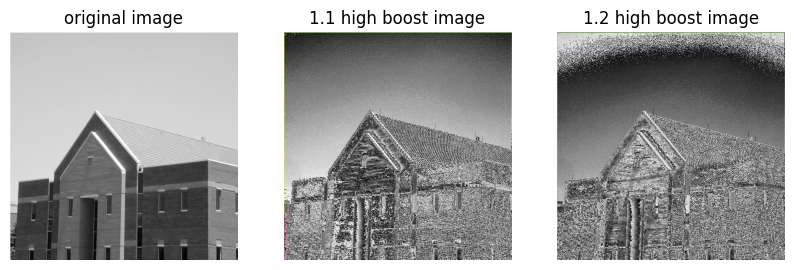

In [ ]:
# high boost filter
a = 1.1
hb_filter1 = [[-1/9,-1/9,-1/9],[-1/9,9*a-1,-1/9],[-1/9,-1/9,-1/9]]
im_highboost1 = img.copy()
im_highboost1[:, :, 0] = signal.convolve2d(img[:, :, 0], hb_filter1, mode="same")
im_highboost1[:, :, 1] = signal.convolve2d(img[:, :, 1], hb_filter1, mode="same")
im_highboost1[:, :, 2] = signal.convolve2d(img[:, :, 2], hb_filter1, mode="same")

a = 1.2
hb_filter2 = [[-1/9,-1/9,-1/9],[-1/9,9*a-1,-1/9],[-1/9,-1/9,-1/9]]
im_highboost2 = img.copy()
im_highboost2[:, :, 0] = signal.convolve2d(img[:, :, 0], hb_filter2, mode="same")
im_highboost2[:, :, 1] = signal.convolve2d(img[:, :, 1], hb_filter2, mode="same")
im_highboost2[:, :, 2] = signal.convolve2d(img[:, :, 2], hb_filter2, mode="same")

# plotting
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,3,2)
plt.imshow(im_highboost1,cmap='gray')
plt.axis('off')
plt.title('1.1 high boost image')

plt.subplot(1,3,3)
plt.imshow(im_highboost2,cmap='gray')
plt.axis('off')
plt.title('1.2 high boost image')

> **4.f Using Unsharp Filter**

Text(0.5, 1.0, 'unsharp 3x3 image')

<Figure size 640x480 with 0 Axes>

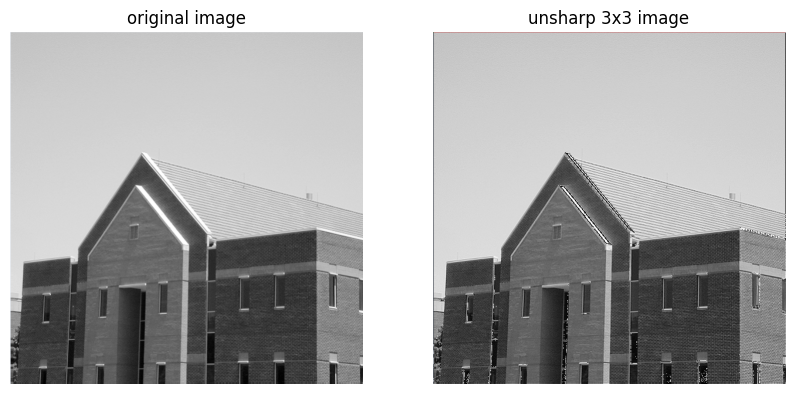

In [ ]:
# unsharp filter
im_unsharp = img + im_highpass

# plotting
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(im_unsharp,cmap='gray')
plt.axis('off')
plt.title('unsharp 3x3 image')

# EXPERIMENT 5

> **5.a HADAMARD TRANSFORM**

In [ ]:
from scipy.linalg import hadamard # using hadamard fn from scipy library
import numpy as np
import random

In [ ]:
N = int(input("Enter matrix order: "))
print(hadamard(N))

Enter matrix order: 4
[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [ ]:
#Implementing 2D Hadamard on a given NxN matrix
#generate integer numbers between 0 and 19
mat = np.random.randint(20,size=(N,N))
H = hadamard(N)
#using np.dot function for matrix multiplication
mat_had = np.dot(H,mat)
mat_had = np.dot(mat_had,np.transpose(H))

In [ ]:
mat

array([[ 5, 17,  5, 17],
       [10, 19,  5,  5],
       [ 1,  6, 18,  5],
       [12,  7,  8, 17]])

In [ ]:
# Inverse Hadamard transform
mat_new = np.dot(np.transpose(H),mat_had)
mat_new=np.dot(mat_new,H)
mat_new=mat_new//(N*N)

In [ ]:
mat_new

array([[ 5, 17,  5, 17],
       [10, 19,  5,  5],
       [ 1,  6, 18,  5],
       [12,  7,  8, 17]])

In [ ]:
print(mat)
print("\n")
print(H)
print("\n")
print(mat_had)
print("\n")
print(mat_new)

[[ 5 17  5 17]
 [10 19  5  5]
 [ 1  6 18  5]
 [12  7  8 17]]


[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


[[157 -29  -3 -13]
 [ -9  -3 -29 -23]
 [  9 -37  41  -5]
 [ 19 -27  -9  41]]


[[ 5 17  5 17]
 [10 19  5  5]
 [ 1  6 18  5]
 [12  7  8 17]]


> **5.b WALSH TRANSFORM**

In [ ]:
# walsh transform
H = ([[1,1,1,1],[1,1,-1,-1],[1,-1,1,-1],[1,-1,-1,1]])
H = np.array(H)
H=H/4

# walsh transform of image
N = 4
mat = np.random.randint(20,size=(N,N))
#using np.dot for matrix multiplication
mat_walsh = np.dot(H,mat)
mat_walsh = np.dot(mat_walsh,np.transpose(H))

#Invese walsh transform
mat_new = np.dot(np.transpose(H),mat_walsh)
mat_new = np.dot(mat_new,H)
mat_new=mat_new*(N*N)

print(mat)
print("\n")
print(H)
print("\n")
print(mat_walsh)
print("\n")
print(mat_new)

[[16  5 16  6]
 [ 8  6  7  4]
 [ 7  7  0  2]
 [ 3  3  0 10]]


[[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25]]


[[ 6.25   0.625  0.875  0.75 ]
 [ 2.25  -0.375  2.375 -0.75 ]
 [ 1.125  0.75   1.5   -0.375]
 [ 1.125 -1.25   0.5    0.625]]


[[16.  5. 16.  6.]
 [ 8.  6.  7.  4.]
 [ 7.  7.  0.  2.]
 [ 3.  3.  0. 10.]]


> **5.x HADAMARD TRANSFORM ON IMAGE**

In [ ]:
#hadamard transform function
def had2(f,N):
  H=hadamard(N)
  F= np.dot(np.dot(H,f),H)
  return(F)

#Inverse Hadamard
def had2inv(F,N):
  H=hadamard(N)
  f= np.dot(np.dot(H,F),H)
  f=f//(N*N)
  return(f)

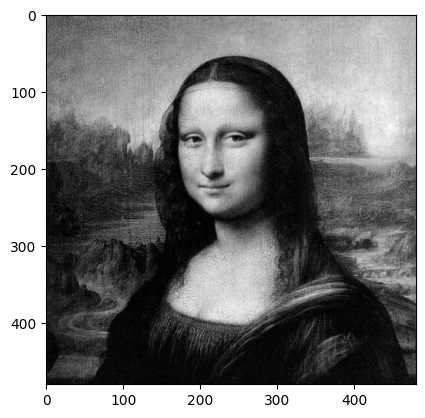

In [ ]:
#im_h_copy = im.copy()
im_h_copy = io.imread("LisaMona2.jpeg") # b&w
sh = im_h_copy.shape
plt.imshow(im_h_copy, cmap="gray")

In [ ]:
sh

(480, 480)

Text(0.5, 1.0, 'Hadamard coefficients')

<Figure size 640x480 with 0 Axes>

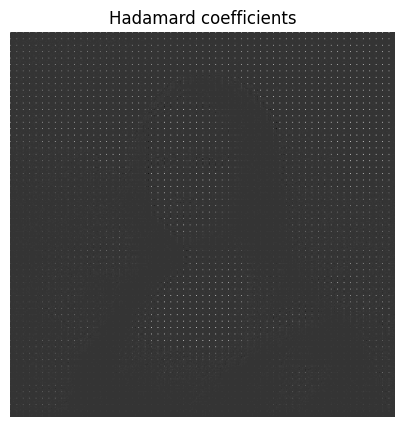

In [ ]:
r=sh[0]
c=sh[1]
# Hadamard Transform on input image by dividing image in 8X8 blocks
N= 8 #Size of the block
im_had = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    im_had[row*N:(row+1)*N,col*N:(col+1)*N] = had2(im_h_copy[row*N:(row+1)*N,col*N:(col+1)*N],N)

plt.figure()
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.axis('off')
plt.imshow(im_had, cmap="gray")
plt.title('Hadamard coefficients')

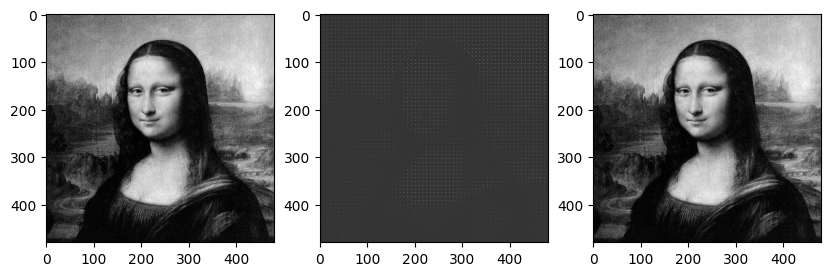

In [ ]:
#Inverse Hadamard transform
N=8
img_new = np.zeros((r,c), dtype=int)
for row in range(r//N):
  for col in range(c//N):
    img_new[row*N:(row+1)*N,col*N:(col+1)*N]=had2inv(im_had[row*N:(row+1)*N,col*N:(col+1)*N],N)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im_h_copy, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(im_had, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img_new, cmap="gray")

> **5.c DISCRETE COSINE TRANSFORM (DCT)**

In [ ]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct

Text(0.5, 1.0, 'DCT coefficients')

<Figure size 640x480 with 0 Axes>

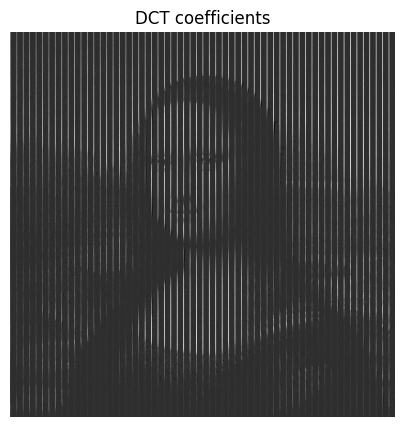

In [ ]:
im_cv2= cv2.imread("LisaMona2.jpeg",0)
m,n=im_cv2.shape
N=8

im_dct=np.zeros((m,n),dtype=int)
for r in range(m//N):
  for c in range(n//N):
    temp=dct(im_cv2[r*N:(r+1)*N,c*N:(c+1)*N])
    temp[2:7,2:7]=0
    im_dct[r*N:(r+1)*N,c*N:(c+1)*N]=temp
plt.figure()
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.axis('off')
plt.imshow(im_dct,cmap='gray')
plt.title('DCT coefficients')

Text(0.5, 1.0, 'DCT Image')

<Figure size 640x480 with 0 Axes>

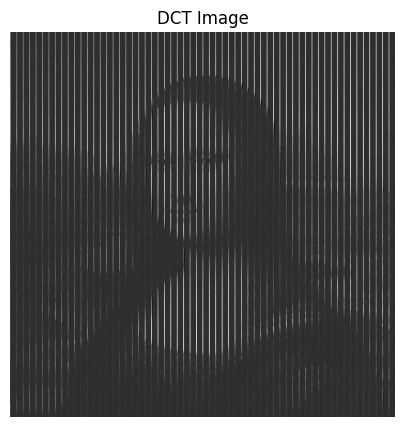

In [ ]:
im_idct=np.zeros((m,n),dtype=int)
for r in range(m//N):
  for c in range(n//N):
    im_idct[r*N:(r+1)*N,c*N:(c+1)*N]=idct(im_dct[r*N:(r+1)*N,c*N:(c+1)*N])

plt.figure()
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.axis('off')
plt.imshow(im_dct,cmap='gray')
plt.title('DCT Image')